# PART I - Fully Connected Neural Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Wine dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Book Genre Classification data. You will be performing a genre classification of books into 32 categories.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the book genre classification cell. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [1]:
import numpy as np
from blg561e.layer import layer
from blg561e.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

### To auto-reload your modules from the *.py files, re run the following cell

In [2]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [3]:
num_inputs = 10
input_shape = (4, 7, 2)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])

relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


#### Backward pass : 
Go under blg561e/layer.py and find AffineLayer class. Implement the backward pass for Affine layer.

In [4]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  7.882509889959262e-10
dw error:  1.3592685518020832e-10
db error:  1.8477112902497496e-10


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [5]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [6]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)

# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  3.2756263483625388e-12


### c. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 
*** Implement your loss computation in the function "loss" of the layer.py ***

The L2 regularizer will be added by you in the Optimization phase later.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [7]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)
softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = layer.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302478992941877
dx error:  9.563859596159055e-09


### d. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivative. Do not forget to use your activation in training part with the Wine data to show that it works and makes sense. You can also plot your activation for litte extra credits.

In [8]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  5.469181638412024e-12


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization to both optimizers.**

In [9]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSDGOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]


In [10]:
student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


In [11]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]

In [12]:
student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known Wine dataset (https://archive.ics.uci.edu/ml/datasets/wine). Each instance has 13 features as the chemical analysis of wines and you will classify the data where the class number is 3 and each class represents different origin of wines.

In [13]:
from sklearn import preprocessing
from sklearn.datasets import load_wine  # Load dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) # Before training, understand your data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
X, y = data.data, data.target # Get the features and the corresponding classes
model = layer.Model() # Create a model instance
 
# Wine dataset has 13 features, so the input size of first layer is 13. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
layers = [layer.AffineLayer(13,64), layer.ReLU(), layer.AffineLayer(64,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(178) # Number of instances in the Wine data is 178
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0
n_epochs = 1200
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-1, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()
    
    if epoch % test_every == 0:
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        test_losses.append(loss)
        test_accs.append([test_acc for i in range(test_every)])
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 1.0262720233252511, Accuracy: 0.49295774647887325
Epoch: 0, Test Loss: 0.7287711752968171, Test Accuracy: 0.5833333333333334
Epoch: 50, Loss: 0.16550396751971724, Accuracy: 0.9647887323943662
Epoch: 100, Loss: 0.06830212039317207, Accuracy: 0.9929577464788732
Epoch: 150, Loss: 0.03325450003283343, Accuracy: 0.9929577464788732
Epoch: 200, Loss: 0.023484579452449705, Accuracy: 0.9929577464788732
Epoch: 200, Test Loss: 0.015832799598586127, Test Accuracy: 1.0
Epoch: 250, Loss: 0.018138392341126904, Accuracy: 0.9929577464788732
Epoch: 300, Loss: 0.015391694217479268, Accuracy: 0.9929577464788732
Epoch: 350, Loss: 0.013651933848381552, Accuracy: 0.9929577464788732
Epoch: 400, Loss: 0.012428511465395987, Accuracy: 0.9929577464788732
Epoch: 400, Test Loss: 0.008056449229067831, Test Accuracy: 1.0
Epoch: 450, Loss: 0.011510769731594619, Accuracy: 0.9929577464788732
Epoch: 500, Loss: 0.010784160279077465, Accuracy: 0.9929577464788732
Epoch: 550, Loss: 0.010187936852613546, Accur

### g. Plot the training and test loss curves for diagnostics below:

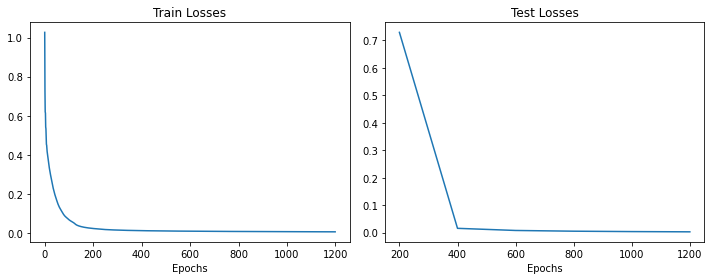

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(train_losses)
axes[1].plot(np.arange(test_every, epoch + test_every, test_every), test_losses)
axes[0].set_title("Train Losses")
axes[1].set_title("Test Losses")
for axis in axes:
    axis.set_xlabel("Epochs")
fig.tight_layout()

# PART II - Book Genre Classification

Now, in this part, you will work with text data (https://arxiv.org/pdf/1610.09204.pdf) for book genre analysis. Originally, the dataset is used for book genre classification by the book cover image. In this part, you will classify the books into their genres by their titles. The total number of genres for the books to be classified into is 32.

Below, we already implemented the preprocessing codes fro the data. Run the below cells and load the text data "book32-listing.csv" into an appropriate form. You will need to use batch-wise optimizer since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [16]:
# Read csv into a data frame
csv = 'book32-listing.csv'
all_data = pd.read_csv(csv, encoding = 'ISO-8859-1', index_col=0)
all_data.head()

,Image,Image_link,Title,Author,Class,Genre
Id,,,,,,
761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [17]:
# As we only care about the Title, Author and Class columns, we will extract them and shuffle the data
# We can enrich the feature representation by including the Author information
from sklearn.utils import shuffle
data = all_data[['Title', 'Author', 'Class']]
data['Text'] = data['Title'].astype(str) + ' ' + data['Author'].astype(str)
data = data[['Text', 'Class']]
data = shuffle(data, random_state=42)
data.head()

/home/batuhanfaik/anaconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Text,Class
Id,,
471839655,Fundamentals of Photonics (Wiley Series in Pur...,23
1604691956,50 Beautiful Deer-Resistant Plants: The Pretti...,8
62237330,Eric: A Novel of Discworld Terry Pratchett,24
472051849,"The North Country Trail: The Best Walks, Hikes...",29
806983590,"The Rug Hook Book: Techniques, Projects And Pa...",8


In [18]:
# Now, we will use some very basic text cleaning steps 
import nltk
import re
# nltk.download('stopwords') # After you download the data, you can comment this line 

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) # Stopwords carry far less meaning than other keywords in the text

def clean_text(text):
    # Remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # Remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # Remove whitespaces 
    text = ' '.join(text.split()) 
    # Convert text to lowercase 
    text = text.lower()
    # Remove stopwords
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    
    return ' '.join(no_stopword_text)

data['Text'] = data['Text'].apply(lambda x: clean_text(x))
data.head()

,Text,Class
Id,,
471839655,fundamentals photonics wiley series pure appli...,23
1604691956,beautiful deer resistant plants prettiest annu...,8
62237330,eric novel discworld terry pratchett,24
472051849,north country trail best walks hikes backpacki...,29
806983590,rug hook book techniques projects patterns eas...,8


In [19]:
# We will extract features from the text and split the data into training, validation and test sets

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500) 
# You can change the max_features if you encounter a memory error, but do not make it too small

x_train_series, y_train = data['Text'][:150000], data['Class'][:150000] # 150K train
x_val_series, y_val = data['Text'][150000:180000], data['Class'][150000:180000] # 30K val
x_test_series, y_test = data['Text'][180000:], data['Class'][180000:] # ~30K test

x_train = np.array(vectorizer.fit_transform(x_train_series).todense())
x_val = np.array(vectorizer.transform(x_val_series).todense())
x_test = np.array(vectorizer.transform(x_test_series).todense())

### a. You will use your implementations (layers.py) below to carry out the book genre classification. Construct your model with all its layers in the cell below.

In [44]:
num_features = x_train.shape[-1]
num_data_points = len(data["Text"])
num_classes = len(np.unique(y_train))    # Number of classes is predetermined via the dataset, however we can obtain it by analyzing the data
book_model = layer.Model()
layers = [
    layer.AffineLayer(num_features, 2048),
    layer.ReLU(),
    layer.AffineLayer(2048, 2048),
    layer.ReLU(),
    layer.AffineLayer(2048, 1024),
    layer.ReLU(),
    layer.AffineLayer(1024, 256),
    layer.ReLU(),
    layer.AffineLayer(256, 64),
    layer.ReLU(),
    layer.AffineLayer(64, num_classes),
    layer.Softmax()]
book_model(layers)
model_grads = [(index, layer_with_weights.dW, layer_with_weights.db) for index, layer_with_weights in enumerate(book_model.layers) if isinstance(layer_with_weights, layer.LayerWithWeights)]

train_accs = []
val_accs = []
train_losses = []
val_losses = []

# Options
shuffle_on_each_epoch = True
mini_batch_size = 128
regularization_strength = 0
momentum = 0.9
n_epochs = 6
print_every = 2
val_every = 2

# predictions = np.ones(num_data_points)
predictions = np.ones(mini_batch_size)
optimizer = layer.SGDWithMomentum(book_model, lr=1e-1, regularization_str=regularization_strength, mu=momentum)

with np.errstate(divide='ignore'):    # Ignore the divide by zero error
    for epoch in range(n_epochs):
        if shuffle_on_each_epoch:
            x_train, y_train = create_permutation(x_train, y_train)
            
        for iteration in range((num_data_points + mini_batch_size - 1) // mini_batch_size):
            x_train_ = x_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]
            y_train_ = y_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]

            if len(x_train_) == 0:
                break
            
            softmax_out = book_model.forward(x_train_)

            predictions = np.argmax(softmax_out, axis=1)
            train_acc = np.mean(predictions == y_train_)
            loss = layer.loss(softmax_out, y_train_)

            train_accs.append(train_acc)
            train_losses.append(loss)

            book_model.backward(y_train_)
            optimizer.optimize()
            
            # Zero out gradients
            for grads in model_grads:
                book_model.layers[grads[0]].dW, book_model.layers[grads[0]].db = np.zeros(grads[1].shape), np.zeros(grads[2].shape)
            
            if iteration % 200 == 0:
                print("Iteration: {}, Loss: {}, Accuracy: {}".format(iteration, loss, train_acc))

        if epoch % print_every == 0:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))

        if epoch % val_every == 0:
            softmax_out = model.forward(x_val)
            predictions = np.argmax(softmax_out, axis=1)
            loss = layer.loss(softmax_out, y_val)
            val_acc = np.mean(predictions == y_val)
            val_losses.append(loss)
            val_accs.append([val_acc for i in range(val_every)])
            print("Epoch: {}, Val Loss: {}, Test Accuracy: {}".format(epoch, loss, val_acc))
            
    # Test the model
    softmax_out = model.forward(x_test)
    predictions = np.argmax(softmax_out, axis=1)
    loss = layer.loss(softmax_out, y_test)
    test_acc = np.mean(predictions == y_test)
    print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))

Iteration: 0, Loss: inf, Accuracy: 0.0078125
Iteration: 200, Loss: 3.3579088209476087, Accuracy: 0.0703125
Iteration: 400, Loss: 3.3313332579244403, Accuracy: 0.08203125
Epoch: 0, Loss: 3.272640349175894, Accuracy: 0.08333333333333333
Epoch: 0, Val Loss: 3.469320014111462, Test Accuracy: 0.05846666666666667
Iteration: 0, Loss: 3.298610521805289, Accuracy: 0.08203125
Iteration: 200, Loss: 3.2930137357342355, Accuracy: 0.07421875
Iteration: 400, Loss: 3.3165789105206986, Accuracy: 0.05859375
Iteration: 0, Loss: 3.278520419872883, Accuracy: 0.0625
Iteration: 200, Loss: 3.1951287559263637, Accuracy: 0.11328125
Iteration: 400, Loss: 3.2788710907330376, Accuracy: 0.09375
Epoch: 2, Loss: 3.2678478086676077, Accuracy: 0.09583333333333334
Epoch: 2, Val Loss: 3.469320014111462, Test Accuracy: 0.05846666666666667
Iteration: 0, Loss: 3.3340584027569964, Accuracy: 0.08984375
Iteration: 200, Loss: 3.31706308375716, Accuracy: 0.08984375
Iteration: 400, Loss: 3.303881266525923, Accuracy: 0.08203125
It

KeyboardInterrupt: 

### b. Plot histogram of the weights of affine layers to see whether the weights vanish or not and comment.

In [ ]:
model_weights = [layer_with_weights.W for layer_with_weights in model.layers if isinstance(layer_with_weights, layer.LayerWithWeights)]

fig, axes = plt.subplots(nrows=1, ncols=len(model_weights), figsize=(25, 4))
for index, weights in enumerate(model_weights):
    print("Shape of Weights at Layer {}: {}".format(index + 1, weights.shape))
    axes[index].hist(weights)
    axes[index].set_title("Hist. of Layer {}".format(index + 1))
fig.tight_layout()

Vanishing weights seems to not be a problem in this model. Because ReLU activation is applied after each affine layer with weights.

### c. Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such.  Avoid overfitting and underfitting as much as possible. We expect you to get at least 50% test accuracy with your final model.

#### 1. Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors.

#### 2. Plot the training and validation losses as you vary the Learning Parameter alpha.

#### 3. Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers.

### d. Finally, fix your model and hyperparameters according to your observations above. Plot accuracy of your classification for training and validation sets, and print your test accuracy. Remember that the test accuracy shoud be at least 50%.